### The Metropolis algorithm

The Metropolis algorithm is a Monte Carlo method used to sample from a probability distribution by accepting or rejecting proposed moves based on a certain probability criterion

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("Solarize_Light2")
np.set_printoptions(suppress = True)

In [2]:
# The Metropolis algorithm (base)
def basic_metropolis(distribution):

    eps = 1e-10
    N = 100_000

    # Defining an initial state
    state = np.random.normal(0, 1)

    data = []
    for _ in range(N):
        
        # Proposing a new state by adding random noise
        new_state = state + np.random.normal(0, 1)
        
        # Computing probabilities
        prob = distribution(state)
        new_prob = distribution(new_state)
        
        # Avoid division by zero
        if prob <= eps:
            prob = eps
        
        ratio = min(1, new_prob / prob)
        X = np.random.rand()
        
        # Accept or reject the proposal
        if X < ratio:
            state = new_state
        
        # Storing the accepted state
        data.append(state)
    
    # Plotting results
    plt.hist(data, bins = 'auto', density = True, alpha = 0.5, color = 'gold', edgecolor = 'gold', label = 'Metropolis Samples')

    mini, maxi = np.min(data), np.max(data)
    x_vals = np.linspace(mini, maxi, int((maxi - mini) / 1e-03))

    plt.plot(x_vals, distribution(x_vals), color = 'gray', alpha = 0.7, linestyle = '--', label = 'Distribution')
    plt.title('Metropolis Algorithm Sampling')
    plt.xlabel('x')
    plt.ylabel('Density function')
    plt.legend(fancybox = True, shadow = True, loc = 'best')
    plt.show()

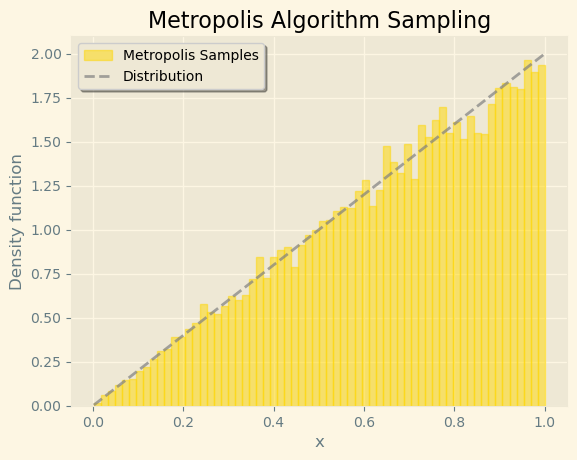

In [3]:
def distribution(x):
    return np.where((x > 0) & (x < 1), 2 * x, 0)

basic_metropolis(distribution)

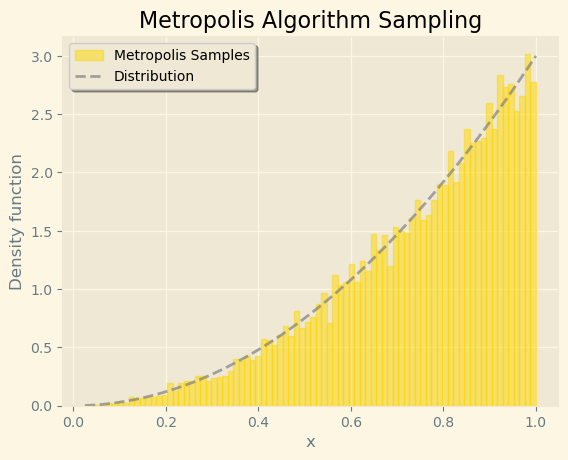

In [4]:
def distribution(x):
    return np.where((x > 0) & (x < 1), 3 * x ** 2, 0)

basic_metropolis(distribution)

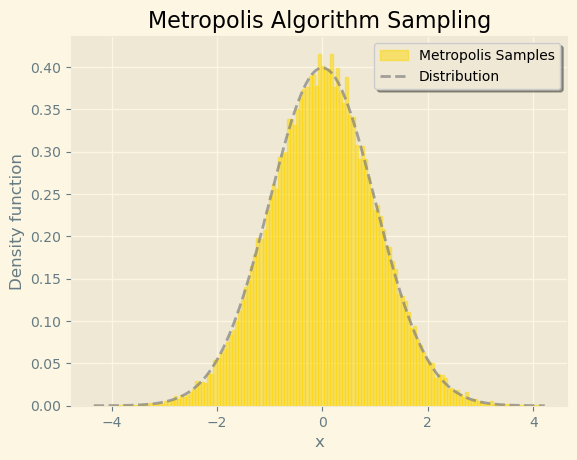

In [5]:
def distribution(x):
    return 1 / (np.sqrt(2 * np.pi)) * np.exp(- 0.5 * x ** 2)

basic_metropolis(distribution)

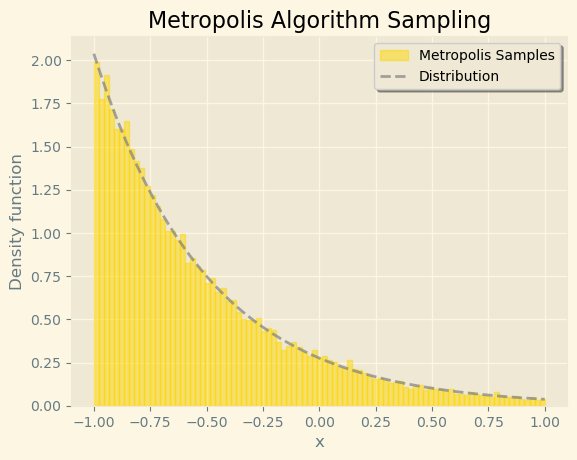

In [6]:
def distribution(x):
    return np.where((x > - 1) & (x < 1), (1 / np.sinh(2)) * np.exp(- 2 * x), 0)

basic_metropolis(distribution)

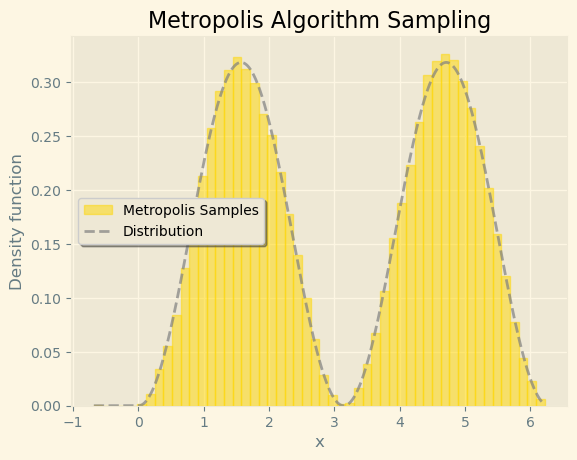

In [7]:
def distribution(x):
    return np.where((x > 0) & (x < (2 * np.pi)), np.sin(x) ** 2 / np.pi, 0)

basic_metropolis(distribution)

### The Ising chain

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5-h5lKt1l9QO4GHtZgnxDiYkDrF0PPBIGFg&s" style="display: block; margin-left: auto; margin-right: auto;" />

One of the most well-known applications of the Metropolis algorithm in physics is to simulate the Ising model. The Ising model consists of a lattice where each point is a particle with spin-1/2. The Hamiltonian of the system for a one-dimensional lattice is:

\begin{equation*}
    \mathcal{H} = - \sum _{i \neq j} ^N J_{ij} \, \sigma_i \, \sigma_j - \sum _i ^ N h_i \, \sigma_ i
\end{equation*}

Where $J_{ij}$ is the spin-spin interaction matrix, $h_i$ is the interaction term between the spin and the external magnetic field and $\sigma_i$ is the spin's value of the i-th particle.

Let’s define the matrix $J$, which represents the interaction between two particles: in the Ising model, particles interact only with their neighbors, so $J$ must be sparse as well. Additionally, the interaction between two particles is bidirectional (i.e., the interaction from $i \rightarrow i+1$ is the same as from $i \leftarrow i+1$), which means $J$ must also be symmetric. Furthermore, if all the coefficients of $J$ are positive, the material is ferromagnetic, while if all the coefficients are negative, the material is diamagnetic

In [8]:
# Number of particles
Np = 150

In [9]:
# Defining J
J = np.zeros((Np + 1, Np + 1))
for i in range(Np):
    for j in range(i + 1, Np):
           if abs(i - j) == 1:
            J[i, j] = np.random.rand() / 2
            J[j, i] = J[i, j]
J

array([[0.        , 0.46570596, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46570596, 0.        , 0.32620361, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.32620361, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.12413425,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12413425, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
# Proof: J is symmetric
np.allclose(J, J.T)

True

In [11]:
# Proof: J is sparse
print(f"size of J: {J.size }")
print(f"Number of zeros: {J.size  - np.count_nonzero(J)}")
print(f"Number of nonzero elements: {np.count_nonzero(J)}")
print(f"Ratio: {((J.size  - np.count_nonzero(J)) / J.size  * 100):.2f} %")

size of J: 22801
Number of zeros: 22503
Number of nonzero elements: 298
Ratio: 98.69 %


$h_i$ is the term describing the interaction between the spin of the i-th particle and an external magnetic field. Generally speaking, if $h_i$ is positive the spin will tend to align with the external field, whereas if it is negative it will tend to align in the opposite direction to the field.

In [12]:
# External magnetic field (random for each spin site)
h = np.random.rand(Np + 1)
h[Np] = 0

h

array([0.79828303, 0.45448655, 0.1950896 , 0.01475686, 0.64138477,
       0.02712252, 0.58928597, 0.70158595, 0.74211626, 0.7689505 ,
       0.34676139, 0.24337107, 0.10487001, 0.43309135, 0.09612054,
       0.38309531, 0.15933785, 0.85299766, 0.80323057, 0.03715415,
       0.9478647 , 0.53701127, 0.33643011, 0.12467982, 0.63244107,
       0.57298261, 0.11680692, 0.52684026, 0.51913722, 0.77786101,
       0.27007499, 0.60628352, 0.90932351, 0.12929896, 0.66171471,
       0.31236067, 0.82715999, 0.51010477, 0.99847756, 0.58951587,
       0.5762299 , 0.15015852, 0.92948646, 0.47253859, 0.31075428,
       0.62400276, 0.97785544, 0.10744305, 0.08913479, 0.72498051,
       0.26209502, 0.26963477, 0.440758  , 0.25389392, 0.99570329,
       0.04421774, 0.18124041, 0.76374127, 0.38578326, 0.48060414,
       0.94247554, 0.85154092, 0.20501324, 0.68581149, 0.01221846,
       0.26675474, 0.21002312, 0.36719986, 0.66468822, 0.37821927,
       0.26957775, 0.9431559 , 0.73290491, 0.98711644, 0.55894

Now, let’s apply the Metropolis algorithm to simulate the Ising chain: a particle is randomly selected, and its spin is virtually flipped. Then, the energy difference of the system is calculated. If this energy difference satisfies the Metropolis criteria, the spin flip is accepted, and the process continues by randomly selecting another particle…

If we flip the i-th spin, the energy difference will be:

\begin{equation*}
    \delta E = 2 \, \sigma_i \left( J_{i - 1, i} \, \sigma_{i - 1} + J_{i, i + 1} \, \sigma_{i + 1} + h_i \right)
\end{equation*}

Then if the initial energy of the system is $E$, the total energy after swapping the i-th spin will be:

\begin{equation*}
    E' = E + \delta E 
\end{equation*}

And now, introducing the Boltzmann distribution factor:

\begin{equation*}
    P(E) \propto e ^ {- \frac{E}{E_T}} \quad  E_T \triangleq k_B T
\end{equation*}

The ratio *proposal_prob / current_prob* is:

\begin{equation*}
    \frac{P(E')}{P(E)} = e ^ {- \frac{\delta E}{E_T}}
\end{equation*}

For physical reasons, the Metropolis accepting criterion would be:

\begin{equation*}
    \delta E < 0 \quad \text{or} \quad X < e ^ {- \frac{\delta E}{E_T}}
\end{equation*}

Where $X$ is a random fluctuation.

In [13]:
# Simulation of the Ising chain
def ising_chain(J, h, E_T):

    # Number of Metropolis steps
    n_steps = 100_000

    # Initializing spins (random configuration of +1 and -1 for each spin)
    spins = np.random.choice([- 1, 1], size = Np + 1)
    spins[Np] = 0

    if isinstance(E_T, (int, float)):

        # Calculating interval for snapshots
        snapshots_count = 10
        interval = n_steps // snapshots_count
        snapshots = []

        for step in range(n_steps):

            # Picking a random spin index to update
            i = np.random.randint(0, Np)

            # Calculating the energy change if we flip (virtually) the i-th spin
            delta_E = 2 * spins[i] * (J[i - 1, i] * spins[i - 1] + J[i, i + 1] * spins[i + 1] + h[i])
            
            # Capping the argument to np.exp at a safe value to prevent overflow
            ratio = np.exp(np.clip(- delta_E / E_T, - 10, 10))
            X = np.random.rand()

            # Accept the flip if energy decreases or with a probability based on the temperature (Boltzmann factor)
            if (delta_E < 0) or (X < ratio):
                spins[i] = - spins[i]  # Flip the spin if accepted

            # Storing snapshots of the spin configuration at regular intervals
            if step % interval == 0:
                snapshots.append(spins.copy())

        # Plotting snapshots
        plt.figure(figsize = (10, 5))
        
        vertical_spacing = 2.5 

        # Iterate over each snapshot and plot the spins as arrows (up for +1 and down for -1)
        for i, snapshot in enumerate(snapshots):
            for j in range(len(snapshot) - 1):
                if snapshot[j] == 1:
                    plt.arrow(j, i * vertical_spacing, 0, 0.8, head_width = 0.2, head_length = 0.2, fc = 'blue', ec = 'blue') # Plot an upward arrow for a spin of +1
                else:
                    plt.arrow(j, i * vertical_spacing, 0, - 0.8, head_width = 0.2, head_length = 0.2, fc = 'red', ec = 'red') # Plot a downward arrow for a spin of -1

        plt.xlim(- 1, Np)
        plt.ylim(- 1, len(snapshots) * vertical_spacing)
        plt.title('1D Ising Model Evolution Over Time', fontsize = 16)
        plt.xlabel('Spin Site', fontsize = 14)
        plt.ylabel('Time (Metropolis Steps)', fontsize = 14)
        step_labels = [f'Step {i * (n_steps // snapshots_count)}' for i in range(len(snapshots))]
        plt.yticks(np.arange(len(snapshots)) * vertical_spacing, step_labels)
        plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5) 
        plt.tight_layout()
        plt.show()

        # Plottig the final configuration of the system
        _, ax = plt.subplots(figsize = (10, 2.5))
        for i in range(len(spins) - 1):
            if spins[i] == 1:
                ax.arrow(i, 0, 0, 0.5, head_width = 0.2, head_length = 0.2, fc = 'blue', ec = 'blue') # Plot an upward arrow for a spin of +1
            else:
                ax.arrow(i, 0, 0, - 0.5, head_width = 0.2, head_length = 0.2, fc = 'red', ec = 'red') # Plot a downward arrow for a spin of -1
        
        ax.set_xlim(- 1, Np)  
        ax.set_ylim(- 1, 1)  
        ax.set_title('Final 1D Ising Model Configuration', fontsize = 16)  
        ax.set_xlabel('Spin Site', fontsize = 14) 
        ax.set_ylabel('Spin Value', fontsize = 14)  
        ax.set_yticks([- 1, 1])  
        ax.set_yticklabels(['-1', '+1']) 
        ax.axhline(0, color = 'gray', linewidth = 0.5)  
        ax.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)  
        plt.tight_layout() 
        plt.show()

    else:

        # Energy-Magnetization function
        def energy_mag():
             E = - (np.sum(J * spins[:, None] * spins) - np.sum(h * spins)) / Np
             M = np.sum(spins) / Np
             return (E, M)

        # Initializing empty lists to store energy and magnetization for each temperature
        E_list = []
        M_list = []

        # Loop over all temperatures
        for e_t in E_T:
            for _ in range(n_steps):

                # Picking a random spin index to update
                i = np.random.randint(0, Np)

                # Calculating the energy change if we flip the i-th spin
                delta_E = 2 * spins[i] * (J[i - 1, i] * spins[i - 1] + J[i, i + 1] * spins[i + 1] + h[i])

                # Capping the argument to np.exp at a safe value to prevent overflow
                ratio = np.exp(np.clip(- delta_E / e_t, - 10, 10))
                X = np.random.rand()

                # Accept the flip if energy decreases or with a probability based on temperature (Boltzmann factor)
                if (delta_E < 0) or (X < ratio):
                    spins[i] = - spins[i]  # Flip the spin if accepted

            E, M = energy_mag()
            
            E_list.append(E)
            M_list.append(M)    
            
        E_list = np.array(E_list)
        M_list = np.array(M_list)

        # Plotting the results
        _, axes = plt.subplots(1, 2, figsize = (10, 5))

        # Plot Energy vs Temperature
        axes[0].plot(E_T, E_list, color = 'gray', linestyle = '-', marker = 'o', label = r"$E / N$")
        axes[0].set_xlabel(r"$k_B T$", fontsize = 14)
        axes[0].set_ylabel(r"$E / N$", fontsize = 14)
        axes[0].set_title("Energy vs Temperature", fontsize = 16)
        axes[0].grid(True, which = 'both', linestyle = '--', linewidth = 0.25, color = 'white')
        axes[0].legend(loc = 'best', fontsize = 12)
        axes[0].tick_params(axis = 'both', which = 'major', labelsize = 12)

        # Plot Magnetization vs Temperature
        axes[1].plot(E_T, M_list, color = 'black', linestyle = '-', marker = 'o', label = r"$M / N$")
        axes[1].set_xlabel(r"$k_B T$", fontsize = 14)
        axes[1].set_ylabel(r"$M / N$", fontsize = 14)
        axes[1].set_title("Magnetization vs Temperature", fontsize = 16)
        axes[1].grid(True, which = 'both', linestyle = '--', linewidth = 0.25, color = 'white')
        axes[1].legend(loc = 'best', fontsize = 12)
        axes[1].tick_params(axis = 'both', which = 'major', labelsize = 12)

        plt.tight_layout()
        plt.show()

    return None

In [14]:
# Thermal energy k_B T
E_T = 1.5

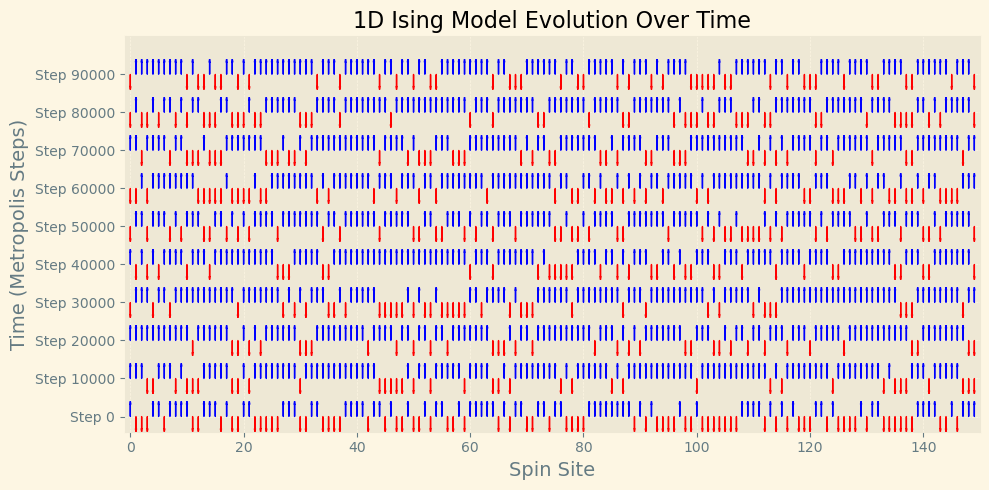

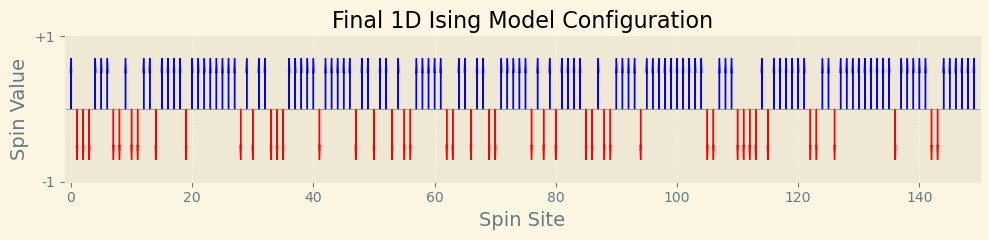

In [15]:
# Simulating the Ising chain for a ferromagnetic material
ising_chain(J, h, E_T)

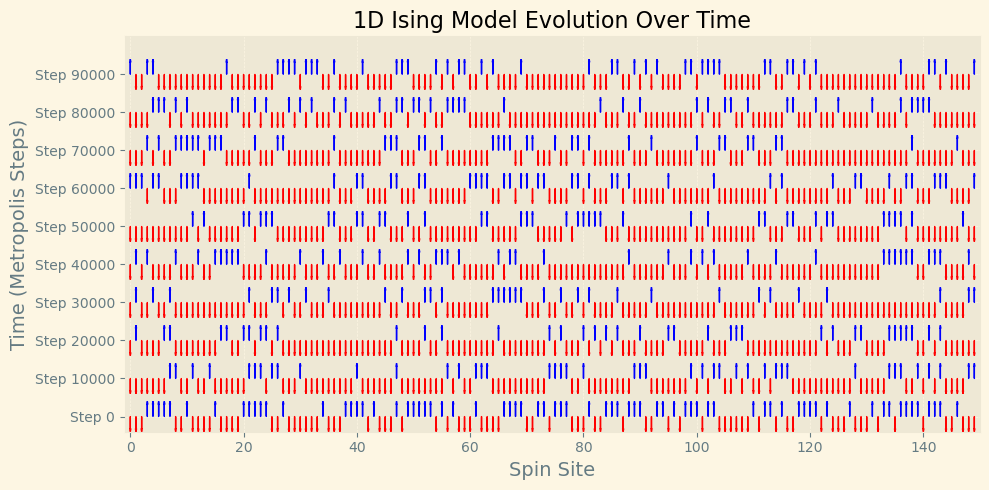

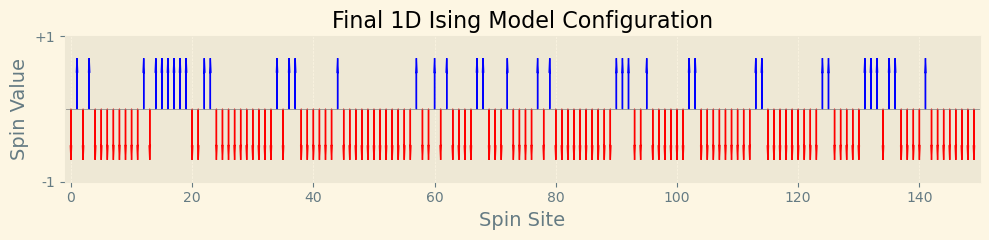

In [16]:
# h -> - h reverse the magnetic field
ising_chain(J, - h, E_T)

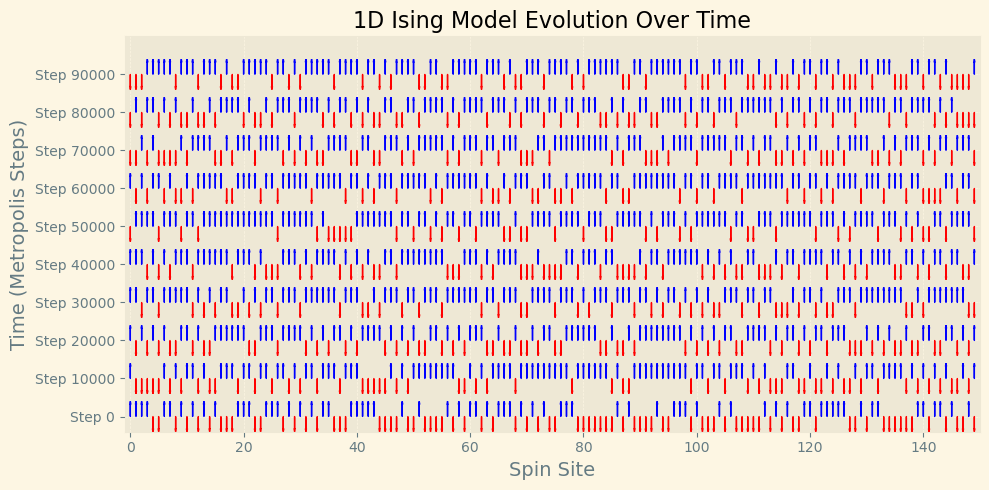

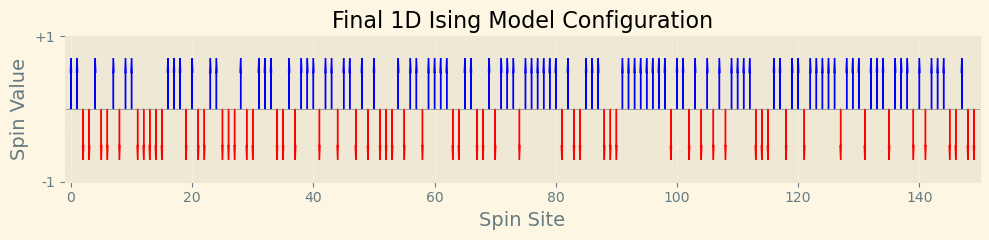

In [17]:
# J -> - J Let the material to be diamagnetic
ising_chain(- J, h, E_T)

In [18]:
# Exploring now a range of thermal energies
E_T = np.linspace(1e-02, 1, 100)

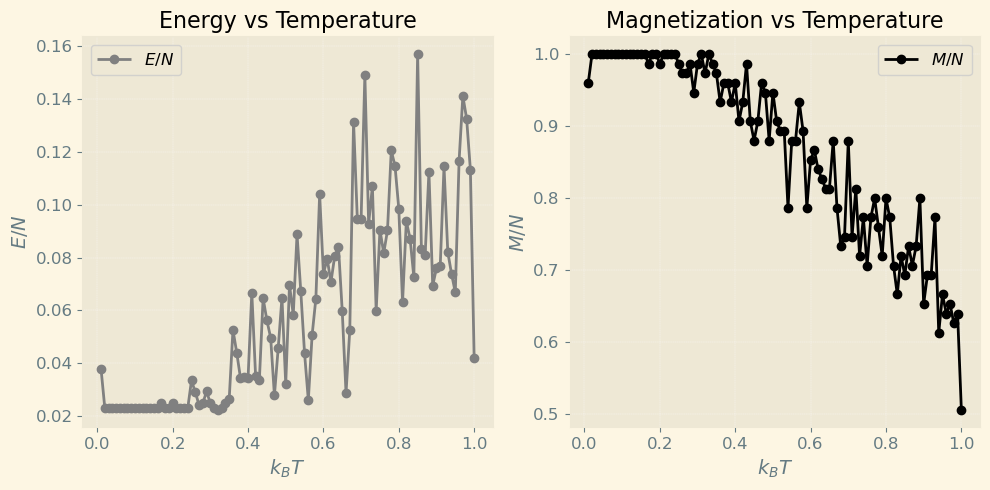

In [19]:
# Ferromagnetic material
ising_chain(J, h, E_T)

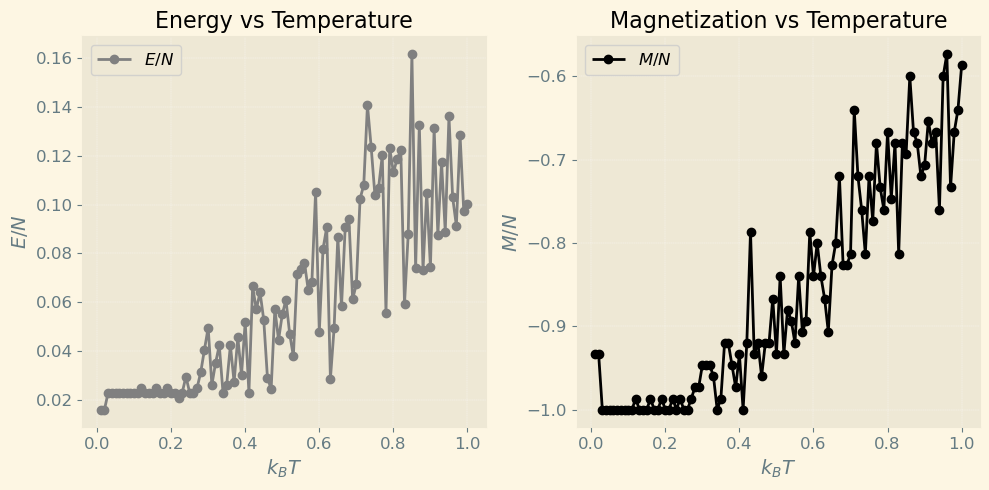

In [20]:
# Reversing the magnetic field
ising_chain(J, - h, E_T)

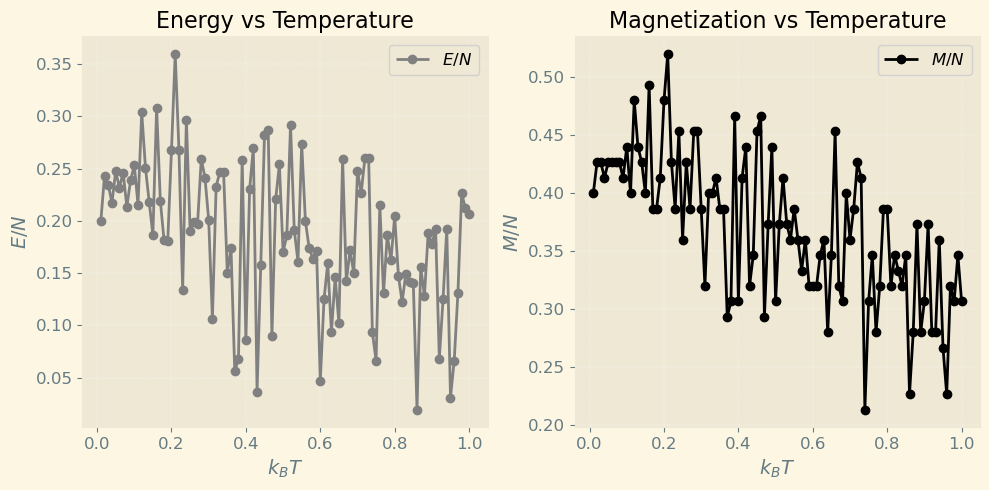

In [21]:
# Diamagnetic material
ising_chain(- J, h, E_T)

In [22]:
# No external magnetic field
h = np.zeros(Np + 1)

# Defining J = 1
J = np.zeros((Np + 1, Np + 1))
for i in range(Np):
    for j in range(i + 1, Np):
           if abs(i - j) == 1:
            J[i, j] = 1
            J[j, i] = J[i, j]
J

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

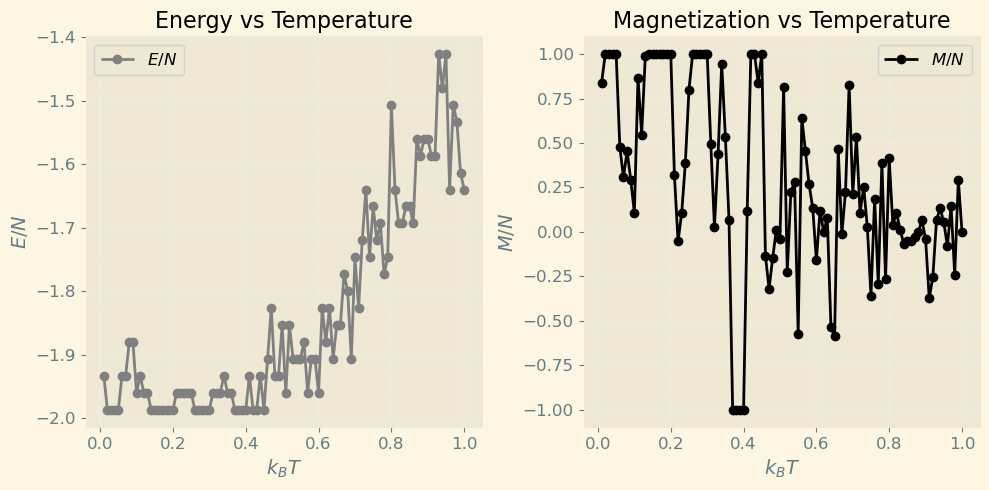

In [23]:
# Ferromagnetic material without external magnetic field
ising_chain(J, h, E_T)

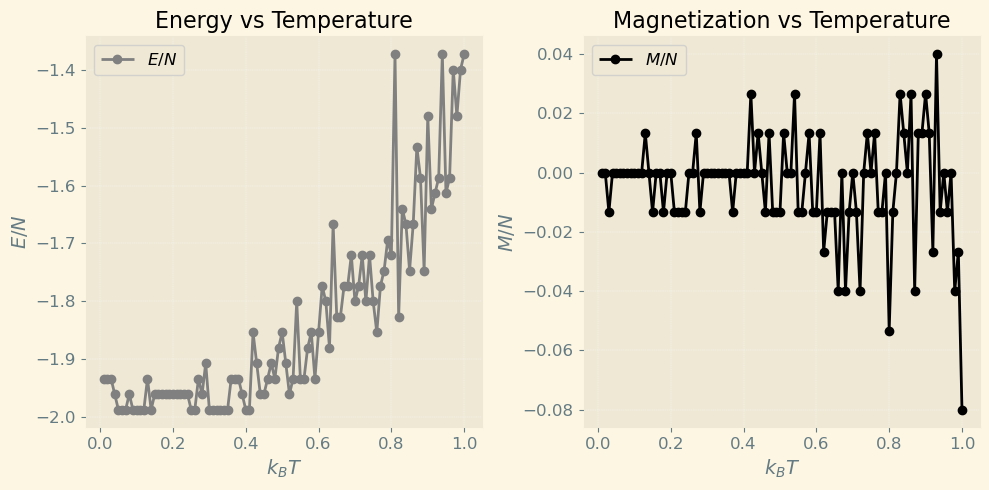

In [24]:
# Diamagnetic material without external magnetic field
ising_chain(- J, h, E_T)

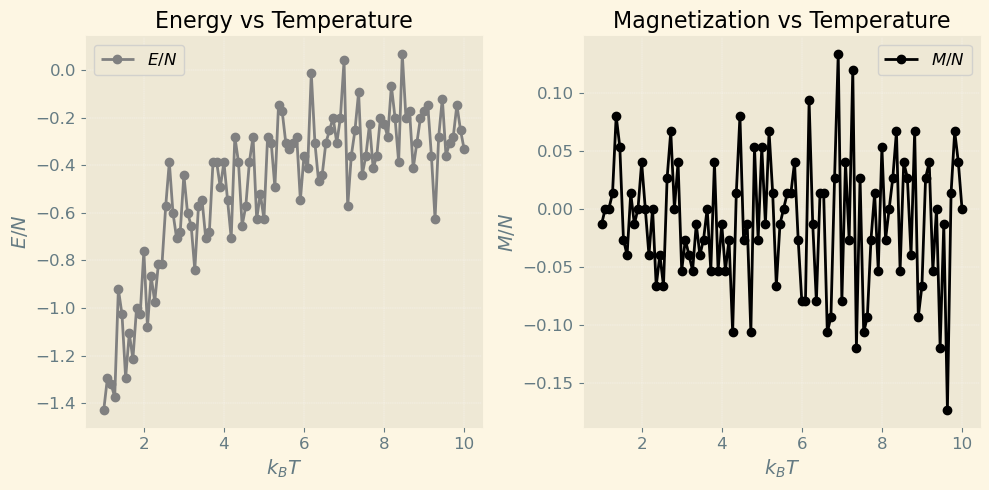

In [25]:
# Diamagnetic material without an external magnetic field at high temperatures
E_T = np.linspace(1, 10, 100)
ising_chain(- J, h, E_T)

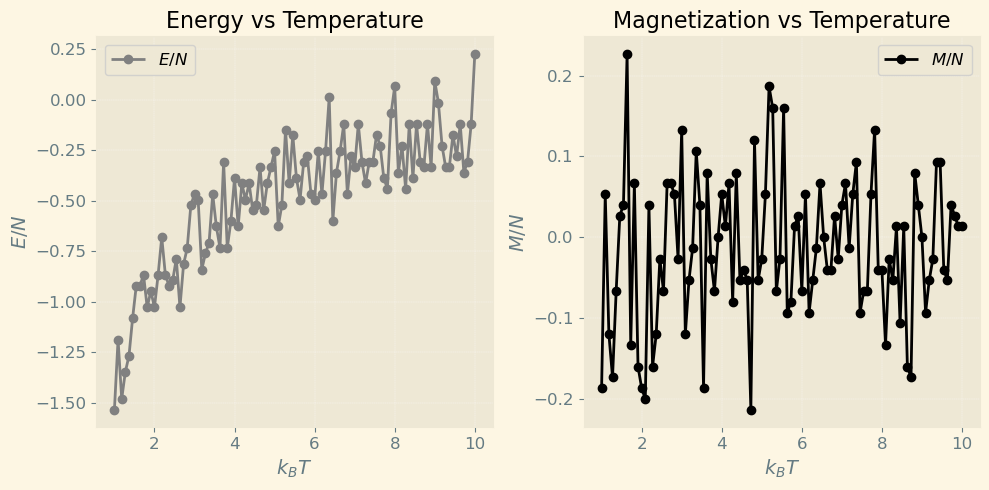

In [26]:
# Ferromagnetic material without an external magnetic field at high temperatures
ising_chain(J, h, E_T)